In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
figs44path = os.path.join(figpath, 'FigS14')
hfn.dir_check(figs44path)

figs44panelpaths = os.path.join(figs44path, 'panels')
hfn.dir_check(figs44panelpaths)

In [3]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))
df_ci = pd.read_csv(os.path.join(fracpath_csv, 'df_all_ci.csv'))

In [4]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

# Panel A - input fractions

In [5]:
df_frac['starter_cat'] = ''
df_frac.loc[df_frac['starter'] > 325, 'starter_cat'] = 'high'
df_frac.loc[df_frac['starter'] < 125, 'starter_cat'] = 'low'

In [6]:
df_frac = df_frac[df_frac.starter_cat.isin(['high', 'low'])]

In [7]:
df_frac_s = pd.DataFrame()
for area in areas_sel:
    this_frac = df_frac[['starter', 'starter_cat', 'target area','area', area]].reset_index(drop = True)
    this_frac['input_area'] = area
    this_frac.columns = ['starter', 'starter_cat','targeted_area','target_area', 'input_fraction', 'area']
    df_frac_s = pd.concat([df_frac_s, this_frac], axis = 0).reset_index(drop = True)

In [8]:
df_frac_s_low = df_frac_s[df_frac_s.starter_cat == 'low']
df_frac_s_high = df_frac_s[df_frac_s.starter_cat == 'high']
res_low = df_frac_s_low.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})
res_high = df_frac_s_high.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})

In [9]:
df_frac_s['grouped_area'] = 'Dist_ctx'
df_frac_s.loc[df_frac_s['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

df_frac_s.loc[df_frac_s['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

df_frac_s.loc[df_frac_s['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [10]:
df_frac_s.to_hdf(os.path.join(fracpath, 'df_frac_stacked.h5'), key = 'df_frac', mode = 'w')

In [11]:
palette = ['C0', 'C1']

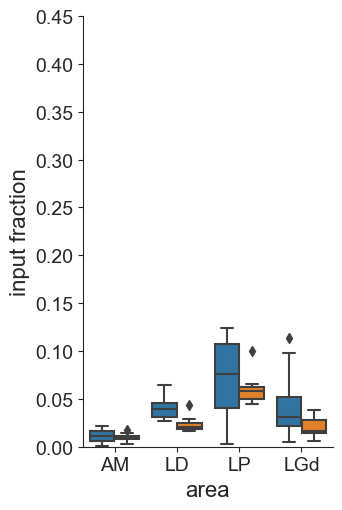

In [12]:
sns.set_style("ticks")
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Thal'],  x = 'area', y ='input_fraction', hue = 'starter_cat', kind="box", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.45)


fig.savefig(os.path.join(figs44panelpaths, 'figS14a1.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14a1.eps'),  bbox_inches='tight', format = 'eps')

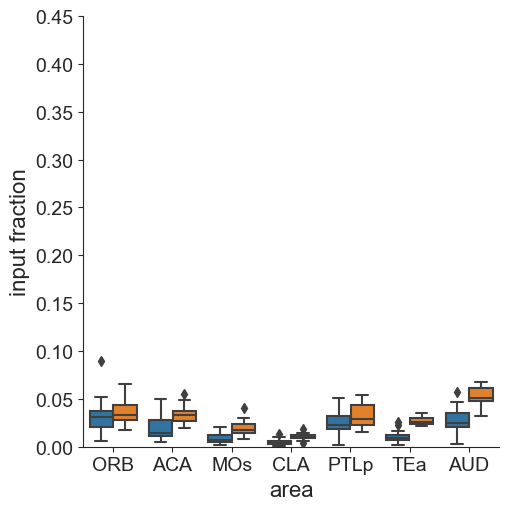

In [13]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Dist_ctx'],  x = 'area', y ='input_fraction', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.45)
# ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs44panelpaths, 'figS14a2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14a2.eps'),  bbox_inches='tight', format = 'eps')

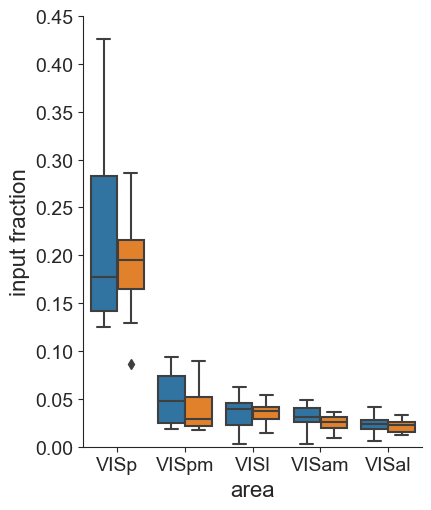

In [14]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'VIS'],  x = 'area', y ='input_fraction', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)

# ax.get_yaxis().set_visible(False)
plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.45)
fig.savefig(os.path.join(figs44panelpaths, 'figS14a3.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14a3.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


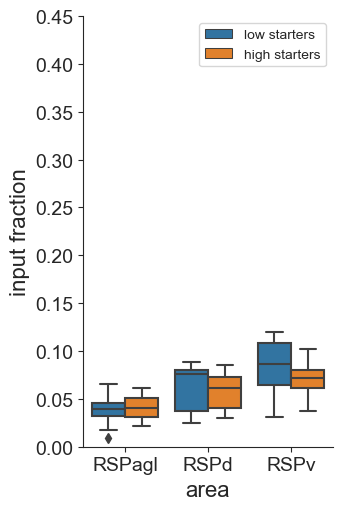

In [15]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'RSP'],  x = 'area', y ='input_fraction', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

label_list = []
for t in ax.get_legend_handles_labels():
    label_list.append(t)
new_list = []
for txt in label_list[1]:
    new_list.append(txt + ' starters')
label_list[1] = new_list

ax.legend(handles=label_list[0], labels=label_list[1])

plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.45)

# ax.get_yaxis().set_visible(False)n

fig.savefig(os.path.join(figs44panelpaths, 'figS14a4.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14a4.eps'),  bbox_inches='tight', format = 'eps')

In [16]:
df_frac_s_low = df_frac_s[df_frac_s.starter_cat == 'low']

In [17]:
result_low = df_frac_s_low.groupby(['area'], as_index=False).agg(
                      {'input_fraction':['mean','std', 'count']})

# Panel B - Convergence index

In [18]:
df_ci['starter_cat'] = ''
df_ci.loc[df_ci['starter'] > 600, 'starter_cat'] = 'high'
df_ci.loc[df_ci['starter'] < 125, 'starter_cat'] = 'low'

In [19]:
df_ci = df_ci[df_ci.starter_cat.isin(['high', 'low'])]

In [20]:
# keep only area in area_sel list
df_ci_s = pd.DataFrame()
for area in areas_sel:
    this_ci = df_ci[['starter', 'starter_cat', 'target area','area', area]].reset_index(drop = True)
    this_ci['input_area'] = area
    this_ci.columns = ['starter', 'starter_cat','targeted_area','target_area', 'ci', 'area']
    df_ci_s = pd.concat([df_ci_s, this_ci], axis = 0).reset_index(drop = True)

In [21]:
df_ci_s_low = df_ci_s[df_ci_s.starter_cat == 'low']
df_ci_s_high = df_ci_s[df_ci_s.starter_cat == 'high']
res_ci_low = df_ci_s_low.groupby(['area'], as_index=False).agg({'ci':['mean', 'std']})
res_ci_high = df_ci_s_high.groupby(['area'], as_index=False).agg({'ci':['mean', 'std']})

In [22]:
df_ci_s['grouped_area'] = 'Dist_ctx'
df_ci_s.loc[df_ci_s['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

df_ci_s.loc[df_ci_s['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

df_ci_s.loc[df_ci_s['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [23]:
df_ci_s.to_hdf(os.path.join(fracpath, 'df_ci_stacked.h5'), key = 'df_ci', mode = 'w')

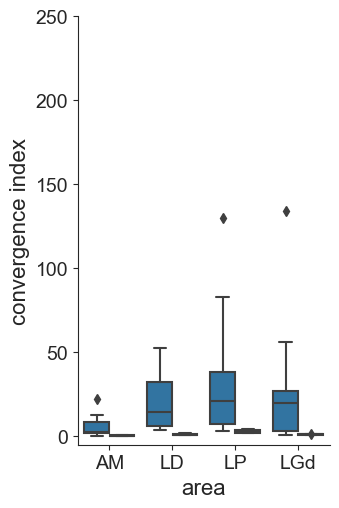

In [24]:
sns.set_style("ticks")
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'Thal'],  x = 'area', y ='ci', hue = 'starter_cat', kind="box", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(-5, 250)


fig.savefig(os.path.join(figs44panelpaths, 'figS14b1.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14b1.eps'),  bbox_inches='tight', format = 'eps')

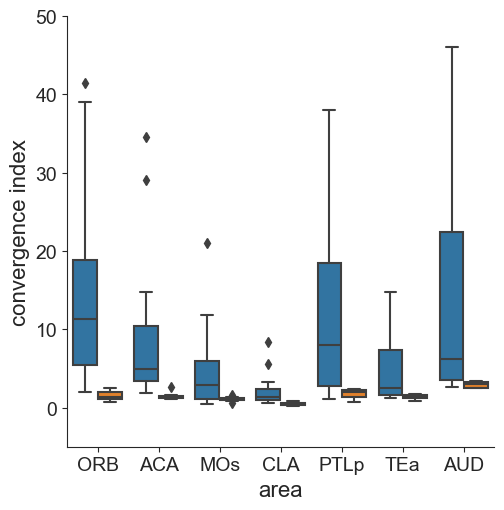

In [25]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'Dist_ctx'],  x = 'area', y ='ci', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(-5, 50)
# ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs44panelpaths, 'figS14b2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14b2.eps'),  bbox_inches='tight', format = 'eps')

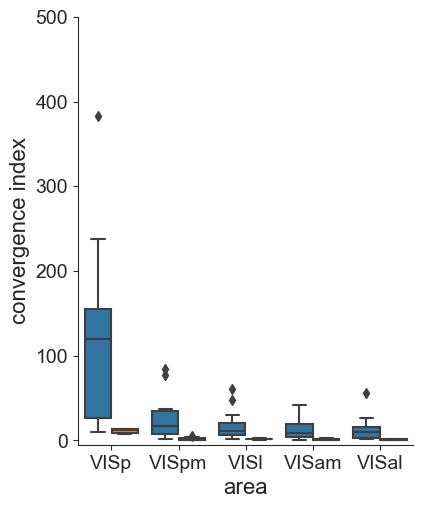

In [26]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'VIS'],  x = 'area', y ='ci', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)

# ax.get_yaxis().set_visible(False)
plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(-5, 500)
fig.savefig(os.path.join(figs44panelpaths, 'figS14b3.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14b3.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


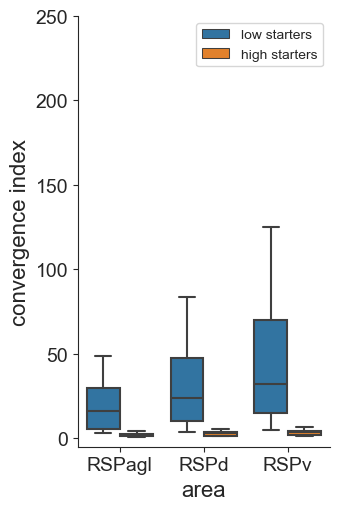

In [27]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'RSP'],  x = 'area', y ='ci', hue = 'starter_cat', kind="box", legend=False)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

label_list = []
for t in ax.get_legend_handles_labels():
    label_list.append(t)
new_list = []
for txt in label_list[1]:
    new_list.append(txt + ' starters')
label_list[1] = new_list

ax.legend(handles=label_list[0], labels=label_list[1])

plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(-5, 250)

# ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs44panelpaths, 'figS14b4.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs44panelpaths, 'figS14b4.eps'),  bbox_inches='tight', format = 'eps')